# 1.0 Look at the Big Picture

When you are learning about Machine Learning it is best to actually experiment with real-world data, not just artificial datasets. Fortunately, there are thousands of open datasets to choose from, ranging across all sorts of domains. You can find a wonderful material in this [github](https://github.com/awesomedata/awesome-public-datasets).


Here are a few places you can look to get data:

Popular open data repositories:
- [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [Amazon’s AWS datasets](https://registry.opendata.aws/)

I chose the CalCOFI: Over 60 years of oceanographic data from the Kaggle repository. This dataset 
represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic data in the world. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. 

<center>
<img width="400" src="http://calcofi.org/images/stories/lter_230_wcoords.jpg">
 </center>
  
The first task I'll try to answer  **Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?**. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

My model should learn from this data and be able to predict  if there is a relationship between water salinity & water temperature, to predict temperature given a measure of salinity.



**Reference**

The California Cooperative Oceanic Fisheries Investigations (CalCOFI), http://calcofi.org/about-calcofi.html



## 2.2 Select a Performance Measure

Your next step is to select a performance measure. A typical performance measure for regression problems is the **Root Mean Square Error (RMSE)**. It measures the standard deviation of the errors the system makes in its predictions.

$$
RMSE(X,h) = \displaystyle \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)}) - y ^{(i)})^2}
$$

This equation introduces several very common Machine Learning notations that we will use throughout this course:
- $m$ is the number of instances in the dataset you are measuring the RMSE on.
  - For example, if you are evaluating the RMSE on a validation set of 2,000 districts, then m = 2,000.
- $x^{(i)}$ is a vector of all the feature values (excluding the label) of the ith instance in the dataset, and $y^{(i)}$ is its label (the desired output
value for that instance).
  - For example, if the first district in the dataset is located at longitude –118.29°, latitude 33.91°, and it has 1,416 inhabitants with a median income of \$ 38,372, and the median house value is $156,400 (ignoring the other features for now), then:
  
$$
x^{(1)} = \begin{bmatrix}
    -118.29 \\
    33.91\\
    1.416 \\
    38.372
\end{bmatrix} \hspace{1.5cm} y^{(1)} = 156.400
$$

- X is a matrix containing all the feature values (excluding labels) of all instances in the dataset. There is one row per instance and the $i^{th}$ row is equal to the transpose of $x^{(i)}$, noted $(x^{(i)})^T$.

$$
X = \begin{bmatrix}
    (x^{(1)})^T\\
    (x^{(2)})^T\\
    \vdots \\
    (x^{(1999)})^T\\
    (x^{(2000)})^T
\end{bmatrix} = 
\begin{bmatrix}
    -118.29 & 33.91 & 1.416 & 38.372\\
    \vdots & \vdots & \vdots & \vdots\\
\end{bmatrix}
$$
- $h$ is your system’s prediction function, also called a $hypothesis$. When your system is given an instance’s feature vector $x^{(i)}$, it outputs a predicted value $\hat{y}^{(i)} = h(x^{(i)})$ for that instance ($\hat{y}$ is pronounced “y-hat”).
  - For example, if your system predicts that the median housing price in the first district is \$158,400, then $\hat{y}^{(1)} = h(x^{(1)}) = 158,400$.
The prediction error for this district is $\hat{y}^{(1)} – y^{(1)} = 2,000$.

# 3.0 Get Data

It's time to get your hands dirty. In typical environments your data would be available in a relational database (or some other common datastore) and spread across multiple tables/documents/files. To access it, you would first need to get
your credentials and access authorizations, and familiarize yourself with the data schema.

In this project, however, things are much simpler: I will just download a single compressed file, [**calcofi.zip**](https://www.kaggle.com/sohier/calcofi), which contains a comma-separated value (CSV) file called bottle.csv with all the data.



## 3.1 Uploading files from my local file system

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(      
      name=fn, length=len(uploaded[fn])))



Saving bottle.csv to bottle.csv
User uploaded file "bottle.csv" with length 257414189 bytes


## 3.2 Take a quick look at the data structure

In [2]:
import pandas as pd

# read the dataset to a Pandas' dataframe
data = pd.read_csv("bottle.csv", low_memory=False)
data.head()

Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat         ...           \
0       0   10.50  33.440     NaN  25.649    NaN         ...            
1       8   10.46  33.440     NaN  25.656    NaN         ...            
2      10   10.46  33.437     NaN  25.654    NaN         ...            
3      19   10.45  33.420     NaN  25.643    NaN         ...            
4      20   10.45  33.421     NaN  25.643    NaN         ...            

   R_PHAEO  R_PRES  R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  \
0      NaN       0     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1      NaN       8     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
2      NaN      10     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
3      NaN      19     NaN   NaN   NaN  NaN  NaN  NaN  NaN   
4      NaN      20     NaN   NaN   NaN  NaN  NaN  NaN  NaN   

   DIC Quality Comment  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 74 columns]

In [4]:
data.tail()

Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
864858    34404   864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0000A-7   
864859    34404   864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0002A-3   
864860    34404   864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0005A-3   
864861    34404   864862  093.4 026.4  20-1611SR-MX-310-2239-09340264-0010A-3   
864862    34404   864863  093.4 026.4  20-1611SR-MX-310-2239-09340264-0015A-3   

        Depthm  T_degC   Salnty  O2ml_L    STheta   O2Sat  \
864858       0  18.744  33.4083   5.805  23.87055  108.74   
864859       2  18.744  33.4083   5.805  23.87072  108.74   
864860       5  18.692  33.4150   5.796  23.88911  108.46   
864861      10  18.161  33.4062   5.816  24.01426  107.74   
864862      15  17.533  33.3880   5.774  24.15297  105.66   

               ...           R_PHAEO  R_PRES  R_SAMP  DIC1  DIC2  TA1  TA2  \
864858         ...              0.18       0     NaN   NaN   NaN  NaN  NaN   
864859         ...              0.18       2     4.0   NaN   NaN  NaN  NaN   
864860         ...              0.18       5     3.0   NaN   NaN  NaN  NaN   
864861         ...              0.31      10     2.0   NaN   NaN  NaN  NaN   
864862         ...              0.61      15     1.0   NaN   NaN  NaN  NaN   

        pH2  pH1  DIC Quality Comment  
864858  NaN  NaN                  NaN  
864859  NaN  NaN                  NaN  
864860  NaN  NaN                  NaN  
864861  NaN  NaN                  NaN  
864862  NaN  NaN                  NaN  

[5 rows x 74 columns]

Each row represents one water sample 500 meters deep. There are 74 attributes:
- **Cst_Cnt**: Auto-numbered Cast Count - all casts consecutively numbered. 1 is first station done.
- **Btl_Cnt**: Auto-numbered Bottle count- all bottles ever sampled, consecutively numbered.
- **Sta_ID**: CalCOFI Line and Station
- **Depth_ID**: [Century]-[YY][MM][ShipCode]-[CastType][Julian Day]-[CastTime]-[Line][Sta][Depth][Bottle]-[Rec_Ind]
- **Depthm**: Depth in meters
- **T_degC**: Temperature of Water
- **Salnty**: Salinity of water
- **O2ml_L**: Milliliters of dissolved oxygen per Liter seawater
- **STheta**: Potential Density of Water
- **02Sat**: Oxygen Saturation
- **Oxy_umol/kg**: Oxygen in micro moles per kilogram of seawater
- **BtlNum**: Bottle Number
- **Reclnd**: Record Indicator
- **T_prec**: Temperature Units of Precision
- **T_qual**: Temperature Quality Code
- **S_prec**: Salinity Units of Precision
- **S_qual**: Salinity Quality Code
- **P_qual**: Pressure Quality Code
- **O_qual**: Oxygen Quality Code
- **SThatq**: Sigma Theta Quality Code
- **O2Satq**: Oxygen Saturation Quality Code
- **ChlorA**: Acetone extracted chlorophyll-a measured fluorometrically
- **Chlqua**: Chlorophyll-a Quality Code
- **Phaeop**: Phaeophytin concentration measured fluorometrically
- **Phaqua**: Phaeophytin Quality Code
- **PO4µM**: Phosphate concentration
- **PO4q**: Phosphate Quality Code
- **SiO3µM**: Silicate concentration
- **SiO3qu**: Silicate Quality Code
- **NO2µM**: Nitrite concentration
- **NO2q**: Nitrite Quality Code
- **NO3µM**: Nitrate concentration
- **NO3q**: Nitrate Quality Code
- **NH3µM**: Ammonium concentration
- **NH3q**: Ammonium Quality Code
- **C14As1**: 14C Assimilation of replicate 1
- **C14A1p**: 14C Assimilation of replicate 1 precision
- **C14A1q**: 14C As1 Quality Code
- **C14As2**: 14C Assimilation of replicate 2
- **C14A2p**: 14C Assimilation of replicate 2 precision
- **C14A2q**: 14C As2 Quality Code
- **DarkAs**: 14C Assimilation Dark Bottle
- **DarkAp**: 14C Assimilation Dark Bottle precision
- **DarkAq**: 14C Assimilation Dark Bottle Quality Code
- **MeanAs**: Mean 14C Assimilation of Bottle 1 and 2
- **MeanAp**: Mean 14C Assimilation of Bottle 1 and 2 precision
- **MeanAq**: Mean 14C Assimilation Quality Code
- **IncTim**: Incubation time
- **LightP**: Light intensities expressed as a percentage
- **R_Depth**: Reported Depth in Meters
- **R_TEMP**: Reported Temperature
- **R_POTEMP**: Reported Potential Temperature
- **R_SALINITY**: Reported Salinity
- **R_SIGMA**: Reported Potential Density of water
- **R_SVA**: Reported Specific Volume Anomaly
- **R_DYNHT**: Reported Dynamic Height
- **R_02**: Reported milliliters of oxygen per liter of seawater
- **R_O2Sat**: Reported Oxygen Saturation
- **R_SIO3**: Reported Silicate Concentration
- **R_PO4**: Reported Phosphate Concentration
- **R_NO3**: Reported Nitrate Concentration
- **R_NO2**: Reported Nitrite Concentration
- **R_NH4**: Reported Ammonium Concentration
- **R_CHLA**: Reported Chlorophyll-a
- **R_PHAEO**: Reported Phaeophytin
- **R_PRES**: Pressure in decibars
- **R_SAMP**: Sample number
- **DIC1**: Replicate 1 - Dissolved Inorganic Carbon in micro moles per kilogram of seawater
- **DIC2**: Replicate 2 - Dissolved Inorganic Carbon in micro moles per kilogram of seawater
- **TA1**: Replicate 1 - Total Alkalinity in micro moles per kilogram of seawater
- **TA2**: Replicate 2 - Total Alkalinity in micro moles per kilogram of seawater
- **PH2** Description not available in Data Dictionary
- **PH1** Description not available in Data Dictionary
- **DIC Quality Comment**: Quality Comments associated with DIC sampling, drawing and analysis




The info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
Cst_Cnt                864863 non-null int64
Btl_Cnt                864863 non-null int64
Sta_ID                 864863 non-null object
Depth_ID               864863 non-null object
Depthm                 864863 non-null int64
T_degC                 853900 non-null float64
Salnty                 817509 non-null float64
O2ml_L                 696201 non-null float64
STheta                 812174 non-null float64
O2Sat                  661274 non-null float64
Oxy_µmol/Kg            661268 non-null float64
BtlNum                 118667 non-null float64
RecInd                 864863 non-null int64
T_prec                 853900 non-null float64
T_qual                 23127 non-null float64
S_prec                 817509 non-null float64
S_qual                 74914 non-null float64
P_qual                 673755 non-null float64
O_qual                 184676 non-null float64
SThtaq  

- There are 864,863 instances in the dataset
- Notice that  there are several fields with **Null values**.  I will need to take care of this later.
-  All attributes are numerical, except the **Sta_ID, Depth_ID, IncTim, DIC Quality Comment** field. The type of them is  **object**, so it could hold any kind of Python object, but since I loaded this data from a CSV file, I know that it is a text attribute, which means that it is probably a categorical attribute.

In [13]:
# Using value_count to find out what categories exist  

data.Sta_ID.value_counts()
data.Depth_ID.value_counts()
data.IncTim.value_counts()
data['DIC Quality Comment'].value_counts()





CTD Bottle Misfire; DIC sample compromised.  CalCOFI Salt and oxygen values are from CTD.                                9
stn changed to 86.7 45.0 was 86.7 40.0                                                                                   6
Bottle tripped at correct depth                                                                                          4
Depth changed to 100m was 50m                                                                                            2
Depth changed to 170m was100m                                                                                            2
DIC Bottle_ID 32 moved to 440m from 515                                                                                  1
Depth changed to 170m from 230m                                                                                          1
Depth changed to 60m not 50m                                                                                             1
Depth changed to

In [0]:
data.IncTim.head(50)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
36    NaN
37    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
Name: IncTim, dtype: object

In [0]:

data.IncTim.isnull().sum()

850426

IncTim - Incubation Time, I will discard this column (IncTim), because it only has 11578 records different from NaN. This column has 680312 records = NaN. This value wiil not influence in my analysis.

My dataset has 691890 records.  

Sta_ID, Depth_ID  are identification data, I will discard them in my analysis.   

DIC Quality Comment - comments (this is a text), this data not influenced in my analysis and then will be discarded.

In [0]:
# The describe() method shows a summary of the numerical attributes
# Note that non numerical features were not shown
data.describe()



Cst_Cnt        Btl_Cnt         Depthm         T_degC  \
count  864863.000000  864863.000000  864863.000000  853900.000000   
mean    17138.790958  432432.000000     226.831951      10.799677   
std     10240.949817  249664.587269     316.050259       4.243825   
min         1.000000       1.000000       0.000000       1.440000   
25%      8269.000000  216216.500000      46.000000       7.680000   
50%     16848.000000  432432.000000     125.000000      10.060000   
75%     26557.000000  648647.500000     300.000000      13.880000   
max     34404.000000  864863.000000    5351.000000      31.140000   

              Salnty         O2ml_L         STheta          O2Sat  \
count  817509.000000  696201.000000  812174.000000  661274.000000   
mean       33.840350       3.392468      25.819394      57.103779   
std         0.461843       2.073256       1.167787      37.094137   
min        28.431000      -0.010000      20.934000      -0.100000   
25%        33.488000       1.360000      24.965000      21.100000   
50%        33.863000       3.440000      25.996000      54.400000   
75%        34.196900       5.500000      26.646000      97.600000   
max        37.034000      11.130000     250.784000     214.100000   

         Oxy_µmol/Kg         BtlNum    ...             R_CHLA        R_PHAEO  \
count  661268.000000  118667.000000    ...      225276.000000  225275.000000   
mean      148.808694      10.497426    ...           0.450225       0.198599   
std        90.187533       6.189688    ...           1.208566       0.376539   
min        -0.434900       0.000000    ...          -0.010000      -3.890000   
25%        60.915470       5.000000    ...           0.050000       0.050000   
50%       151.064150      10.000000    ...           0.160000       0.110000   
75%       240.379600      16.000000    ...           0.390000       0.230000   
max       485.701800      25.000000    ...          66.110000      65.300000   

              R_PRES         R_SAMP         DIC1         DIC2          TA1  \
count  864863.000000  122006.000000  1999.000000   224.000000  2084.000000   
mean      228.395694     162.071521  2153.239714  2168.148330  2256.055845   
std       319.456731      85.722796   112.995202   154.852332    34.844435   
min         0.000000       0.000000  1948.850000  1969.440000  2181.570000   
25%        46.000000     200.000000  2028.330000  2008.977500  2230.322500   
50%       126.000000     206.000000  2170.640000  2265.885000  2244.325000   
75%       302.000000     214.000000  2253.810000  2315.525000  2278.505000   
max      5458.000000     424.000000  2367.800000  2364.420000  2434.900000   

               TA2        pH2        pH1  
count   234.000000  10.000000  84.000000  
mean   2278.858803   7.948570   7.910983  
std      58.496495   0.021216   0.077666  
min    2198.150000   7.923100   7.618300  
25%    2229.062500   7.931475   7.898675  
50%    2247.505000   7.946650   7.928850  
75%    2316.452500   7.963300   7.955100  
max    2437.000000   7.988300   8.047700  

[8 rows x 70 columns]

- The **count, mean, min, and max** rows are self-explanatory. 
- Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640). 
- The **std** row shows the standard deviation (which measures how dispersed the values are). 
- The **25%, 50%, and 75%** rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group
of observations falls. For example, 25%  **02Sat** lower than 21.100000, while 50% are lower than 54.400000 and 75% are lower than 97.600000. These are often called the 25th percentile (or 1st quartile), the median,   and the 75th percentile (or 3rd quartile).

### 3.2.1 Histogram

Another quick way to get a feel of the type of data you are dealing with is **to plot a histogram** for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). it will plot a histogram for each numerical column that represents a metric. Numeric columns that are identifiers (for example, **Sta_ID**) will not be displayed in a histogram.

I generated a new dataset (**data_metric**), it only has fields with metric values and does not have the fields replicated (eg, **T_degC** is equal to **R_TEMP** and **R_POTEMP**, the difference  is the precision of decimal places, see the description of the fields in section 3.2).

I discarded the columns **IncTim, Depth_ID, DIC Quality Comment**  

(**data_metric**) will be the dataset used in the analysis.

In [0]:
data_metric = data.loc[:,["Depthm", "T_degC", "Salnty", "O2ml_L", "STheta", "O2Sat", "Oxy_µmol/Kg", "ChlorA", "Phaeop", "PO4uM", "SiO3uM", "NO2uM", "NO3uM", "NH3uM", "LightP", "R_SVA", "R_DYNHT", "R_PRES"]]   

#val_bool = data["Depthm"] == data["R_Depth"]
#val_bool.value_counts(dropna=False)
#val_bool = data["Depthm"] != data["R_Depth"]
#valores = data[val_bool]
#print(valores[["Depthm","R_Depth" ]])

#val_bool = data["T_degC"] == data["R_POTEMP"]
#val_bool.value_counts(dropna=False)
#val_bool = data["T_degC"] != data["R_POTEMP"]
#valores = data[val_bool]
#print(valores[["T_degC","R_POTEMP" ]])

#val_bool = data["Salnty"] == data["R_SALINITY"]
#val_bool.value_counts(dropna=False)
#val_bool = data["Salnty"] != data["R_SALINITY"]
#valores = data[val_bool]
#print(valores[["T_degC","R_TEMP" ]])

#val_bool = data["O2ml_L"] == data["R_O2"]
#val_bool.value_counts(dropna=False)
#val_bool = data["O2ml_L"] != data["R_O2"]
#valores = data[val_bool]
#print(valores[["O2ml_L","R_O2"]])

#val_bool = data["ChlorA"] == data["R_CHLA"]
#val_bool.value_counts(dropna=False)
#val_bool = data["ChlorA"] != data["R_CHLA"]
#valores = data[val_bool]
#print(valores[["ChlorA","R_CHLA"]])



In [63]:
data_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 18 columns):
Depthm         864863 non-null int64
T_degC         853900 non-null float64
Salnty         817509 non-null float64
O2ml_L         696201 non-null float64
STheta         812174 non-null float64
O2Sat          661274 non-null float64
Oxy_µmol/Kg    661268 non-null float64
ChlorA         225272 non-null float64
Phaeop         225271 non-null float64
PO4uM          413317 non-null float64
SiO3uM         354091 non-null float64
NO2uM          337576 non-null float64
NO3uM          337403 non-null float64
NH3uM          64962 non-null float64
LightP         18651 non-null float64
R_SVA          812092 non-null float64
R_DYNHT        818206 non-null float64
R_PRES         864863 non-null int64
dtypes: float64(16), int64(2)
memory usage: 118.8 MB


In [142]:
data_metric.head()

Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  Oxy_µmol/Kg  ChlorA  Phaeop  \
0       0   10.50  33.440     NaN  25.649    NaN          NaN     NaN     NaN   
1       8   10.46  33.440     NaN  25.656    NaN          NaN     NaN     NaN   
2      10   10.46  33.437     NaN  25.654    NaN          NaN     NaN     NaN   
3      19   10.45  33.420     NaN  25.643    NaN          NaN     NaN     NaN   
4      20   10.45  33.421     NaN  25.643    NaN          NaN     NaN     NaN   

   PO4uM  SiO3uM  NO2uM  NO3uM  NH3uM  LightP  R_SVA  R_DYNHT  R_PRES  
0    NaN     NaN    NaN    NaN    NaN     NaN  233.0     0.00       0  
1    NaN     NaN    NaN    NaN    NaN     NaN  232.5     0.01       8  
2    NaN     NaN    NaN    NaN    NaN     NaN  232.8     0.02      10  
3    NaN     NaN    NaN    NaN    NaN     NaN  234.1     0.04      19  
4    NaN     NaN    NaN    NaN    NaN     NaN  234.0     0.04      20

In [143]:
data_metric.tail()

Depthm  T_degC   Salnty  O2ml_L    STheta   O2Sat  Oxy_µmol/Kg  \
864858       0  18.744  33.4083   5.805  23.87055  108.74       253.47   
864859       2  18.744  33.4083   5.805  23.87072  108.74       253.47   
864860       5  18.692  33.4150   5.796  23.88911  108.46       253.06   
864861      10  18.161  33.4062   5.816  24.01426  107.74       253.92   
864862      15  17.533  33.3880   5.774  24.15297  105.66       252.08   

        ChlorA  Phaeop  PO4uM  SiO3uM  NO2uM  NO3uM  NH3uM  LightP  R_SVA  \
864858   0.905   0.176   0.22    1.77  0.029   0.10   0.02     NaN  402.4   
864859   0.905   0.176   0.22    1.77  0.029   0.10   0.00     NaN  402.5   
864860   0.915   0.182   0.20    1.75  0.027   0.09   0.00     NaN  400.8   
864861   1.078   0.313   0.25    1.99  0.030   0.11   0.12     NaN  389.1   
864862   2.118   0.614   0.31    2.58  0.054   0.14   0.07     NaN  376.0   

        R_DYNHT  R_PRES  
864858    0.000       0  
864859    0.008       2  
864860    0.020       5  
864861    0.040      10  
864862    0.059      15

In [9]:
data_metric.describe()

Depthm         T_degC         Salnty         O2ml_L  \
count  864863.000000  853900.000000  817509.000000  696201.000000   
mean      226.831951      10.799677      33.840350       3.392468   
std       316.050259       4.243825       0.461843       2.073256   
min         0.000000       1.440000      28.431000      -0.010000   
25%        46.000000       7.680000      33.488000       1.360000   
50%       125.000000      10.060000      33.863000       3.440000   
75%       300.000000      13.880000      34.196900       5.500000   
max      5351.000000      31.140000      37.034000      11.130000   

              STheta          O2Sat    Oxy_µmol/Kg         ChlorA  \
count  812174.000000  661274.000000  661268.000000  225272.000000   
mean       25.819394      57.103779     148.808694       0.450185   
std         1.167787      37.094137      90.187533       1.208570   
min        20.934000      -0.100000      -0.434900      -0.001000   
25%        24.965000      21.100000      60.915470       0.050000   
50%        25.996000      54.400000     151.064150       0.160000   
75%        26.646000      97.600000     240.379600       0.390000   
max       250.784000     214.100000     485.701800      66.110000   

              Phaeop          PO4uM         SiO3uM          NO2uM  \
count  225271.000000  413317.000000  354091.000000  337576.000000   
mean        0.198553       1.564747      26.606587       0.042316   
std         0.376543       1.035966      27.648190       0.104196   
min        -3.890000       0.000000       0.000000       0.000000   
25%         0.050000       0.470000       3.110000       0.000000   
50%         0.110000       1.570000      18.000000       0.010000   
75%         0.230000       2.480000      41.540000       0.030000   
max        65.300000       5.210000     196.000000       8.190000   

               NO3uM         NH3uM        LightP          R_SVA  \
count  337403.000000  64962.000000  18651.000000  812092.000000   
mean       17.302247      0.084877     18.356509     220.938918   
std        14.581958      0.273061     29.852839      93.483703   
min        -0.400000      0.000000      0.000000       0.400000   
25%         0.600000      0.000000      0.280000     143.700000   
50%        18.100000      0.000000      1.800000     203.200000   
75%        30.000000      0.060000     24.000000     299.800000   
max        95.000000     15.630000     99.900000     683.400000   

             R_DYNHT         R_PRES  
count  818206.000000  864863.000000  
mean        0.431763     228.395694  
std         0.382336     319.456731  
min         0.000000       0.000000  
25%         0.130000      46.000000  
50%         0.340000     126.000000  
75%         0.640000     302.000000  
max         3.880000    5458.000000

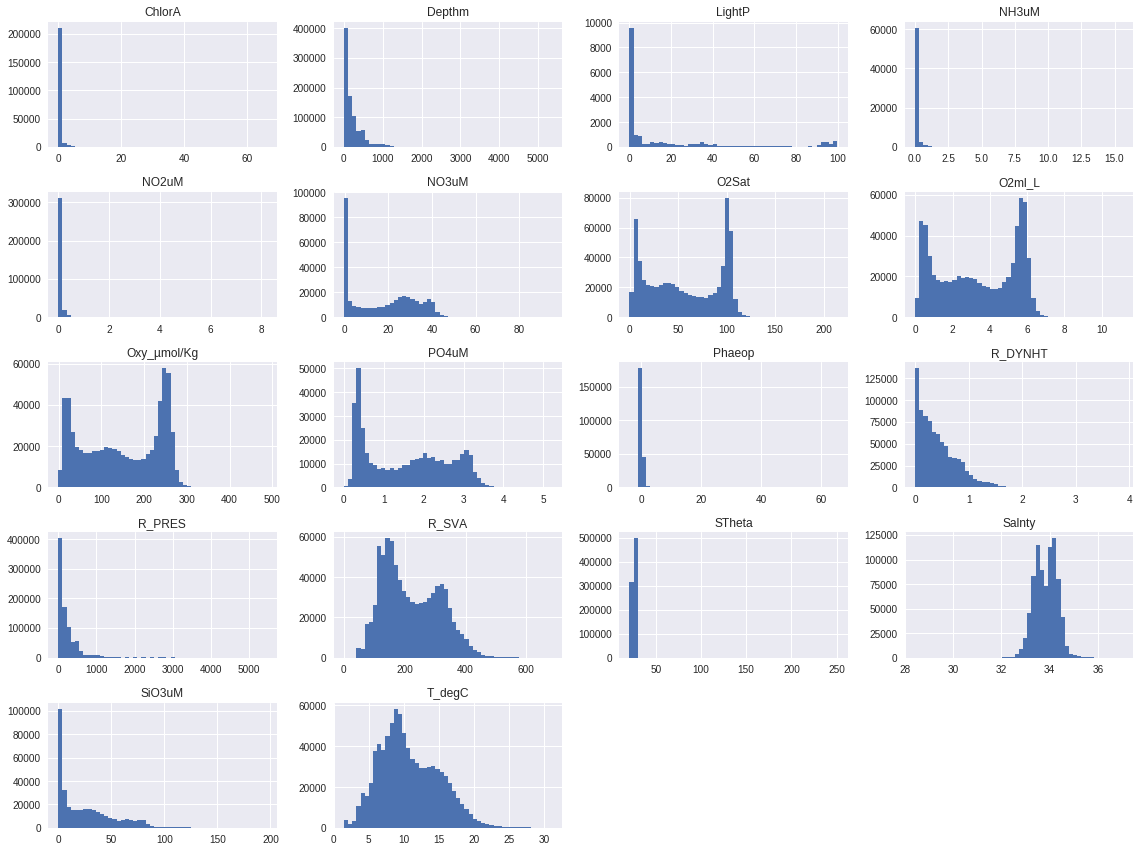

In [7]:
import matplotlib.pyplot as plt


data_metric.hist(bins=50, figsize=(16,12))
plt.tight_layout()
plt.show()                                        
                                        
                                        


In [0]:
# Só preciso desta função porque estou usando o Colab, no Jupiter não é necessário
# Cell Configuration for plotly over google colab
# This method pre-populates the outputframe with the configuration that Plotly
# expects and must be executed for every cell which is displaying a Plotly graph.
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [19]:
import numpy as np
import pandas as pd
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()   #esta linha se for para rodar no Jupiter é para está comentada
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=1000,height=400)

# generate a histogram from column Salnty
trace = [go.Histogram(x=data_metric["Salnty"], nbinsx=50)]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

# generate a histogram from column T_degC
trace1 = [go.Histogram(x=data_metric["T_degC"], nbinsx=50)]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig1 = go.Figure(data=trace1,layout=layout)
pyo.iplot(fig1)

Notice a few things in these histograms:

1. These attributes have very **different scales**. I will discuss this later when I explore **feature scaling**.
2. Finally, **many histograms are tail heavy**: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. I will try **transforming these attributes later on to have more bell-shaped distributions**.

### 3.2.2 Create a Test Set

I Created  a test set (**test_set**),  just pick some instances randomly, typically 20% of the
dataset, and set them aside:



In [0]:
import numpy as np

# data_metric - dataset only with columns that represents a metric. 
# test_ratio - percentage used to the test set
def split_train_test(data_metric, test_ratio):
  
  #scramble the position
  shuffled_indices = np.random.permutation(len(data_metric))
  #find the test set size
  test_set_size = int(len(data_metric) * test_ratio)
  #split the indices
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  
  return data_metric.iloc[train_indices], data_metric.iloc[test_indices]

In [5]:
train_set, test_set = split_train_test(data_metric, 0.2)
print("data_metric has {} atributes, that is the same of {}\
 train instances + {} test intances ({})".
      format(len(data_metric),len(train_set),len(test_set),len(train_set)+len(test_set)))


data_metric has 864863 atributes, that is the same of 691891 train instances + 172972 test intances (864863)


Well, this works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, **which is what you want to avoid.**

[Scikit-Learn](http://scikit-learn.org/stable/) provides a few functions to split datasets into multiple subsets in various ways. The simplest function is [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) , which does pretty much the same thing as the function *split_train_test* defined earlier, with a couple of additional features. 

- First there is a **random_state** parameter that allows you to set the random generator seed
- And second you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels)

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_metric, 
                                       test_size=0.2, 
                                       random_state=35)

print("data_metric has {} instances\n {} train instances\n {} test intances".
      format(len(data_metric),len(train_set),len(test_set)))


data_metric has 864863 instances
 691890 train instances
 172973 test intances


# 4.0 Discover and Visualize the Data to Gain Insights

So far I have only taken a quick glance at the data to get a general understanding of the kind of data I am manipulating. Now the goal is to go a little bit more in depth.

- First, make sure you have put the test set aside and **you are only exploring the training set**. 
- Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. 
- Let’s **create a copy** so I can play with it without harming the training set


In [7]:
train = train_set.copy()
train.describe()

Depthm         T_degC         Salnty         O2ml_L  \
count  691890.000000  683177.000000  654134.000000  556783.000000   
mean      226.705861      10.800799      33.840173       3.391900   
std       316.019927       4.243716       0.461885       2.073366   
min         0.000000       1.440000      28.431000      -0.010000   
25%        46.000000       7.680000      33.487000       1.360000   
50%       125.000000      10.060000      33.862000       3.440000   
75%       300.000000      13.890000      34.196000       5.500000   
max      5351.000000      31.140000      37.034000      11.130000   

              STheta          O2Sat    Oxy_µmol/Kg         ChlorA  \
count  649903.000000  528963.000000  528957.000000  180190.000000   
mean       25.819414      57.105311     148.815227       0.450586   
std         1.204278      37.092712      90.186922       1.218432   
min        20.934000      -0.100000      -0.434900      -0.001000   
25%        24.964285      21.000000      60.909290       0.050000   
50%        25.996000      54.300000     151.057500       0.160000   
75%        26.646000      97.530000     240.385500       0.390000   
max       250.784000     214.100000     485.701800      66.110000   

              Phaeop          PO4uM         SiO3uM          NO2uM  \
count  180190.000000  330431.000000  283126.000000  269902.000000   
mean        0.198506       1.564495      26.585259       0.042392   
std         0.385857       1.036105      27.609131       0.103604   
min        -3.890000       0.000000       0.000000       0.000000   
25%         0.050000       0.460000       3.140000       0.000000   
50%         0.110000       1.570000      18.000000       0.010000   
75%         0.230000       2.480000      41.500000       0.030000   
max        65.300000       5.210000     196.000000       8.190000   

               NO3uM         NH3uM        LightP          R_SVA  \
count  269767.000000  52078.000000  14899.000000  649821.000000   
mean       17.296624      0.084787     18.356063     220.971002   
std        14.578918      0.274438     29.866363      93.458965   
min        -0.400000      0.000000      0.000000       0.400000   
25%         0.600000      0.000000      0.270000     143.800000   
50%        18.100000      0.000000      1.700000     203.200000   
75%        30.000000      0.060000     24.000000     299.900000   
max        95.000000     15.630000     99.900000     683.400000   

             R_DYNHT         R_PRES  
count  654648.000000  691890.000000  
mean        0.431513     228.268823  
std         0.382062     319.431641  
min         0.000000       0.000000  
25%         0.130000      46.000000  
50%         0.340000     126.000000  
75%         0.638000     302.000000  
max         3.880000    5458.000000

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691890 entries, 165957 to 202441
Data columns (total 18 columns):
Depthm         691890 non-null int64
T_degC         683177 non-null float64
Salnty         654134 non-null float64
O2ml_L         556783 non-null float64
STheta         649903 non-null float64
O2Sat          528963 non-null float64
Oxy_µmol/Kg    528957 non-null float64
ChlorA         180190 non-null float64
Phaeop         180190 non-null float64
PO4uM          330431 non-null float64
SiO3uM         283126 non-null float64
NO2uM          269902 non-null float64
NO3uM          269767 non-null float64
NH3uM          52078 non-null float64
LightP         14899 non-null float64
R_SVA          649821 non-null float64
R_DYNHT        654648 non-null float64
R_PRES         691890 non-null int64
dtypes: float64(16), int64(2)
memory usage: 100.3 MB


## 4.1 Visualizing water salinity & water temperature



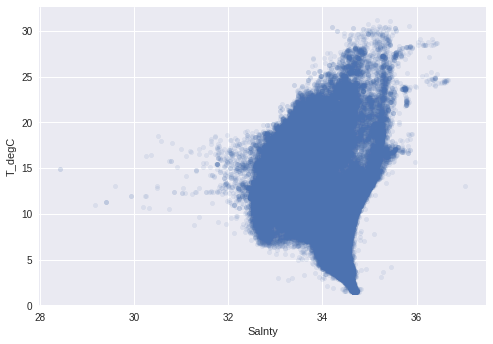

In [12]:
train.plot(kind="scatter", x="Salnty", y="T_degC", alpha=0.1)


At first glance it doesn't seem like there's a strong relationship between the two. 

In [0]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=600,height=400)

# generate a scatter 
trace = [go.Scatter(
    x=train["T_degC"], 
    y=train["Salnty"],
    mode = 'markers',
    marker = dict(
      opacity = 0.1))]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

## 4.2 Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the **corr()** method:

In [59]:
corr_matrix = train.corr()

corr_matrix["T_degC"].sort_values(ascending=False)

T_degC         1.000000
R_SVA          0.964097
O2Sat          0.850613
O2ml_L         0.795716
Oxy_µmol/Kg    0.795564
LightP         0.345078
NH3uM          0.131522
ChlorA         0.109161
NO2uM          0.097895
Phaeop         0.014664
Salnty        -0.504340
R_PRES        -0.679315
Depthm        -0.680674
R_DYNHT       -0.798929
STheta        -0.803265
SiO3uM        -0.840405
PO4uM         -0.904137
NO3uM         -0.925442
Name: T_degC, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the temperature water (**T_degC**) tends to go up when the specific volume anomaly (**R_SVA**) goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a negative correlation between the water salinity (**Salnty**) and the temperature water value (**T_degC**) (i.e., water temperatures  have a  tendency to go down when water salinity  increases ). Finally, coefficients close to zero mean that there is no linear correlation.

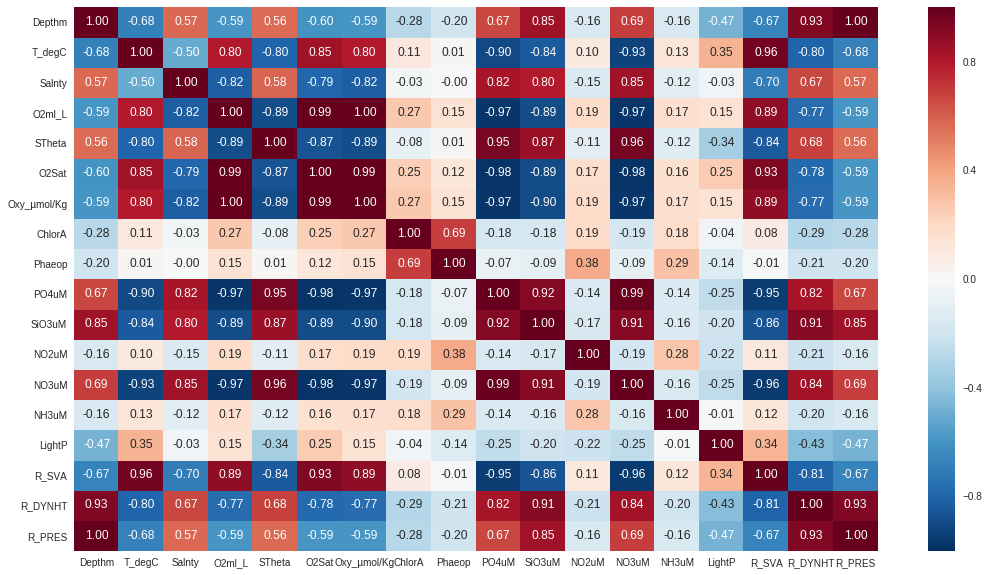

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 10))
sns.heatmap(train.corr(), 
            annot=True, fmt=".2f")


In [69]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=700,height=400)

# generate a scatter 
trace = [go.Heatmap(
    x=train.corr().index, 
    y=train.corr().index,
    z=train.corr().values,
    colorscale ='Jet')]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

Another way to check for correlation between attributes is to use [Seaborn’ pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function, which plots every numerical attribute against every other numerical attribute. The main diagonal (top left to bottom right) would be full of straight lines if Seaborn plotted each variable against itself, which would not be very useful. So instead Seaborn displays a histogram of each attribute.
I need to **remove all NaN values**  to apply this function.

In [20]:
# count the number of missing values
train.isnull().sum()

Depthm              0
T_degC           8713
Salnty          37756
O2ml_L         135107
STheta          41987
O2Sat          162927
Oxy_µmol/Kg    162933
ChlorA         511700
Phaeop         511700
PO4uM          361459
SiO3uM         408764
NO2uM          421988
NO3uM          422123
NH3uM          639812
LightP         676991
R_SVA           42069
R_DYNHT         37242
R_PRES              0
dtype: int64

Since I have fields with a null value, I will do a data cleansing. At the moment, I will creat a copy dataset (**train_clean**) and I will delete the instances that have fields with missing values.

In [70]:
train_clean = train.copy()
train_clean.dropna(inplace=True)
train_clean.isnull().sum()


Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
ChlorA         0
Phaeop         0
PO4uM          0
SiO3uM         0
NO2uM          0
NO3uM          0
NH3uM          0
LightP         0
R_SVA          0
R_DYNHT        0
R_PRES         0
dtype: int64

In [16]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1713 entries, 837366 to 850174
Data columns (total 18 columns):
Depthm         1713 non-null int64
T_degC         1713 non-null float64
Salnty         1713 non-null float64
O2ml_L         1713 non-null float64
STheta         1713 non-null float64
O2Sat          1713 non-null float64
Oxy_µmol/Kg    1713 non-null float64
ChlorA         1713 non-null float64
Phaeop         1713 non-null float64
PO4uM          1713 non-null float64
SiO3uM         1713 non-null float64
NO2uM          1713 non-null float64
NO3uM          1713 non-null float64
NH3uM          1713 non-null float64
LightP         1713 non-null float64
R_SVA          1713 non-null float64
R_DYNHT        1713 non-null float64
R_PRES         1713 non-null int64
dtypes: float64(16), int64(2)
memory usage: 254.3 KB


In [22]:
corr_matrix = train_clean.corr()

corr_matrix["T_degC"].sort_values(ascending=False)

T_degC         1.000000
R_SVA          0.970272
O2Sat          0.708670
LightP         0.519951
Oxy_µmol/Kg    0.384885
O2ml_L         0.379826
Salnty         0.028036
NH3uM         -0.117615
ChlorA        -0.210315
Phaeop        -0.356359
NO2uM         -0.466241
R_DYNHT       -0.484902
Depthm        -0.554825
R_PRES        -0.554879
SiO3uM        -0.732172
NO3uM         -0.761554
PO4uM         -0.796856
STheta        -0.971763
Name: T_degC, dtype: float64

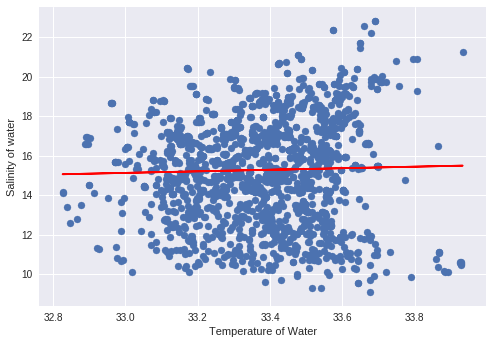

In [71]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

#read data

X = train_clean[['Salnty']]
y = train_clean[['T_degC']]


#train model on data
model = linear_model.LinearRegression()
model.fit(X, y)

#visualize results
plt.scatter(X.values,y.values)
plt.plot(X.values,model.predict(X),color='red')
plt.xlabel('Temperature of Water')
plt.ylabel('Salinity of water')

plt.show()

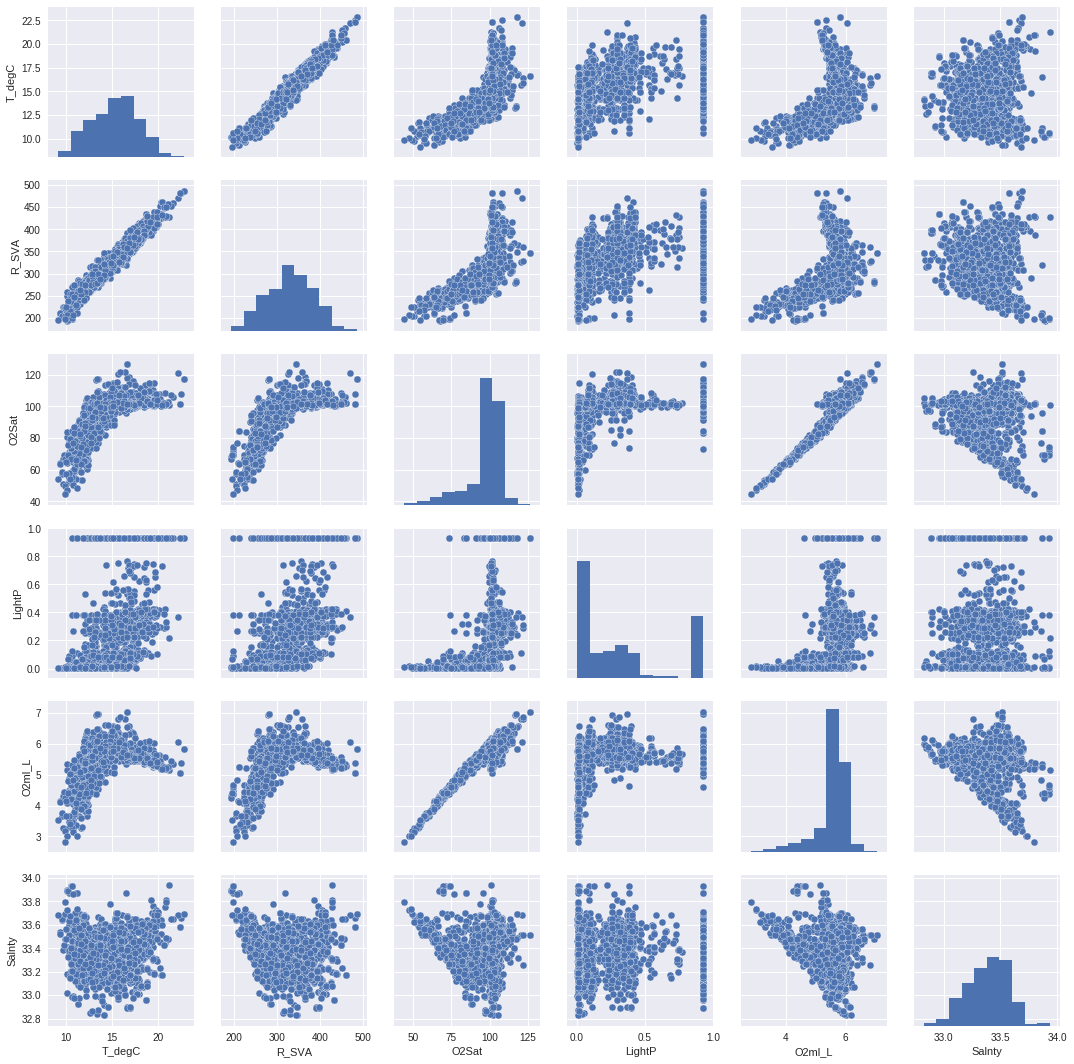

In [22]:
import seaborn as sns
columns = ["T_degC", "R_SVA", "O2Sat","LightP","O2ml_L","Salnty"]
sns.pairplot(train_clean[columns], diag_kind='hist')

The most promising attribute to predict the ***water temperature (T_degC)** is the **specific volume anomaly (R_SVA)**, **Salinity (Salnty)** continues with poorly defined behavior. I have to try to find some relationship between water salinity and water temperature, so let’s zoom in on their correlation scatterplot.

In [72]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=600,height=400,
                  xaxis=dict(title='Specific Volume Anomaly '),
                  yaxis=dict(title='Water Temperature')) 

# generate a scatter 
trace = [go.Scatter(
    y=train_clean["R_SVA"], 
    x=train_clean["T_degC"],
    mode = 'markers')]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

In [73]:
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=600,height=400,
                  xaxis=dict(title='Salnty '),
                  yaxis=dict(title='Water Temperature')) 

# generate a scatter 
trace = [go.Scatter(
    y=train_clean["Salnty"], 
    x=train_clean["T_degC"],
    mode = 'markers')]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=trace,layout=layout)
pyo.iplot(fig)

## 4.3 Experimenting with Attribute Combinations

Hopefully the previous sections gave you an idea of a few ways **you can explore the data and gain
insights**. 

- You identified a few data quirks that you may want to **clean up before feeding** the data to a
Machine Learning algorithm, and you found interesting correlations between attributes, in particular with
the target attribute. 
- You also noticed that some attributes have a **tail-heavy distribution**, so you may want
to transform them (e.g., by computing their logarithm). Of course, your mileage will vary considerably
with each project, but the general ideas are similar.
- One last thing you may want to do before actually preparing the data for Machine Learning algorithms is
to try out various attribute combinations. 
  
Let’s create these new attributes:

In [0]:
# attribute combinations
train["O2Sat_per_Depthm"] = train["O2Sat"]/train["Depthm"]
train["Salnty_per_Depthm"]=train["Salnty"]/train["Depthm"]

In [24]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691890 entries, 165957 to 202441
Data columns (total 20 columns):
Depthm               691890 non-null int64
T_degC               683177 non-null float64
Salnty               654134 non-null float64
O2ml_L               556783 non-null float64
STheta               649903 non-null float64
O2Sat                528963 non-null float64
Oxy_µmol/Kg          528957 non-null float64
ChlorA               180190 non-null float64
Phaeop               180190 non-null float64
PO4uM                330431 non-null float64
SiO3uM               283126 non-null float64
NO2uM                269902 non-null float64
NO3uM                269767 non-null float64
NH3uM                52078 non-null float64
LightP               14899 non-null float64
R_SVA                649821 non-null float64
R_DYNHT              654648 non-null float64
R_PRES               691890 non-null int64
O2Sat_per_Depthm     528963 non-null float64
Salnty_per_Depthm    654134 non-nul

Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  Oxy_µmol/Kg  ChlorA  \
165957     900    4.26  34.443    0.49  27.323    6.8     21.30138     NaN   
753099      50   16.01  33.187    5.72  24.354  101.5    249.38170    0.12   
78576      300    7.46     NaN    1.02     NaN    NaN          NaN     NaN   
260513      69   16.48  33.580    5.58  24.549  100.1    243.23170     NaN   
636206      10   13.63  33.140    6.08  24.827  102.8    264.95480    0.50   

        Phaeop  PO4uM  SiO3uM  NO2uM  NO3uM  NH3uM  LightP  R_SVA  R_DYNHT  \
165957     NaN    NaN     NaN    NaN    NaN    NaN     NaN   83.4     1.22   
753099    0.03   0.37     0.7    0.0    0.0    NaN     NaN  357.9     0.17   
78576      NaN    NaN     NaN    NaN    NaN    NaN     NaN    NaN      NaN   
260513     NaN    NaN     NaN    NaN    NaN    NaN     NaN  340.0     0.28   
636206    0.13   0.40     1.4    0.0    0.0    NaN     NaN  311.5     0.03   

        R_PRES  O2Sat_per_Depthm  Salnty_per_Depthm  
165957     907          0.007556           0.038270  
753099      50          2.030000           0.663740  
78576      302               NaN                NaN  
260513      69          1.450725           0.486667  
636206      10         10.280000           3.314000

In [25]:
train_correlation_matrix = train.corr()
train_correlation_matrix["T_degC"].sort_values(ascending=False)

T_degC               1.000000
R_SVA                0.964097
O2Sat                0.850613
O2ml_L               0.795716
Oxy_µmol/Kg          0.795564
LightP               0.345078
Salnty_per_Depthm    0.328511
O2Sat_per_Depthm     0.327289
NH3uM                0.131522
ChlorA               0.109161
NO2uM                0.097895
Phaeop               0.014664
Salnty              -0.504340
R_PRES              -0.679315
Depthm              -0.680674
R_DYNHT             -0.798929
STheta              -0.803265
SiO3uM              -0.840405
PO4uM               -0.904137
NO3uM               -0.925442
Name: T_degC, dtype: float64

# 5.0 Prepare the Data for Machine Learning Algorithms

The goal is to find some relationship between water salinity and water temperature.
But first let’s revert to a clean training set, and let’s **separate the predictors** and **the labels** since we don’t necessarily want to apply the same transformations to the predictors and the target values.

In [0]:
# just to remind ...
# train_set, test_set = train_test_split(data_metric, test_size=0.2, random_state=35)

# drop creates a copy of the remain data and does not affect train_set
train_X = train_set.drop("T_degC", axis=1)

# copy the label (y) from train_set
train_y = train_set.T_degC.copy()


## 5.1 Data Cleaning

**Most Machine Learning algorithms cannot work with missing features**, so let’s create a few functions to take care of them. You noticed earlier that the **total_bedrooms** attribute has some missing values, so let’s fix this. 


In [149]:
# count the number of missing values
train_X.isnull().sum()

Depthm              0
Salnty          37756
O2ml_L         135107
STheta          41987
O2Sat          162927
Oxy_µmol/Kg    162933
ChlorA         511700
Phaeop         511700
PO4uM          361459
SiO3uM         408764
NO2uM          421988
NO3uM          422123
NH3uM          639812
LightP         676991
R_SVA           42069
R_DYNHT         37242
R_PRES              0
dtype: int64

I choose set the missing values to some value(median), I compute the median value on the training set, and use it to fill the missing values in the training set.

Scikit-Learn provides a handy class to take care of missing values: Imputer. Here is how to use it.

In [9]:
# First, you need to create an Imputer instance, specifying that you want 
# to replace each attribute’s missing values with the median of that attribute:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

# Now you can fit the imputer instance to the training data using 
# the fit() method:
imputer.fit(train_X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

The imputer has simply computed the median of each attribute and stored the result in its **statistics_ instance variable**. 

I have  **many attribute** with missing values, so **it is safer to apply the imputer to all the numerical attributes**:

In [10]:
imputer.statistics_

array([1.250000e+02, 3.386200e+01, 3.440000e+00, 2.599600e+01,
       5.430000e+01, 1.510575e+02, 1.600000e-01, 1.100000e-01,
       1.570000e+00, 1.800000e+01, 1.000000e-02, 1.810000e+01,
       0.000000e+00, 1.700000e+00, 2.032000e+02, 3.400000e-01,
       1.260000e+02])

In [11]:
train_X.median().values

array([1.250000e+02, 3.386200e+01, 3.440000e+00, 2.599600e+01,
       5.430000e+01, 1.510575e+02, 1.600000e-01, 1.100000e-01,
       1.570000e+00, 1.800000e+01, 1.000000e-02, 1.810000e+01,
       0.000000e+00, 1.700000e+00, 2.032000e+02, 3.400000e-01,
       1.260000e+02])

In [0]:
# Now you can use this “trained” imputer to transform the training set by 
# replacing missing values by the learned medians:
train_X_array = imputer.transform(train_X)

# The result is a plain Numpy array containing the transformed features. 
# If you want to put it back into a Pandas DataFrame, it’s simple:
train_X_array_df = pd.DataFrame(train_X_array, columns=train_X.columns)

In [154]:
train_X_array_df.isnull().sum()

Depthm         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
ChlorA         0
Phaeop         0
PO4uM          0
SiO3uM         0
NO2uM          0
NO3uM          0
NH3uM          0
LightP         0
R_SVA          0
R_DYNHT        0
R_PRES         0
dtype: int64

## 5.3 Custom Transformers

Although Scikit-Learn provides many useful transformers, **you will need to write your own for tasks such as custom cleanup operations or combining specific attributes**. 

You will want your transformer to work seamlessly with Scikit-Learn functionalities. All you need is to create a class and implement three methods: 
- fit()
- transform()
- fit_transform()

You can get the last one for free by simply adding
TransformerMixin as a base class. Also, if you add BaseEstimator as a base class (and avoid *args
and **kargs in your constructor) you will get two extra methods (get_params() and set_params())
that will be useful for automatic hyperparameter tuning. For example, here is a small transformer class
that adds the combined attributes we discussed earlier:

In [37]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691890 entries, 165957 to 202441
Data columns (total 17 columns):
Depthm         691890 non-null int64
Salnty         654134 non-null float64
O2ml_L         556783 non-null float64
STheta         649903 non-null float64
O2Sat          528963 non-null float64
Oxy_µmol/Kg    528957 non-null float64
ChlorA         180190 non-null float64
Phaeop         180190 non-null float64
PO4uM          330431 non-null float64
SiO3uM         283126 non-null float64
NO2uM          269902 non-null float64
NO3uM          269767 non-null float64
NH3uM          52078 non-null float64
LightP         14899 non-null float64
R_SVA          649821 non-null float64
R_DYNHT        654648 non-null float64
R_PRES         691890 non-null int64
dtypes: float64(15), int64(2)
memory usage: 95.0 MB


In [0]:
import numpy as np

# these classes will be useful later for automatic hyperparameter tuning 
from sklearn.base import BaseEstimator, TransformerMixin

# indices for the columns
O2Sat_ix, Salnty_ix, Depthm_ix = 4, 1,  0


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

  def __init__(self, add_Salnty_per_Depthm = True): # no *args or **kargs
    self.add_Salnty_per_Depthm = add_Salnty_per_Depthm
    
  def fit(self, X, y=None):
    return self # nothing else to do
  
  def transform(self, X, y=None):
    O2Sat_per_Depthm = X[:, O2Sat_ix] / X[:, Depthm_ix]
    if self.add_Salnty_per_Depthm:
      Salnty_per_Depthm = X[:, Salnty_ix] / X[:, Depthm_ix]
      # Translates slice objects to concatenation along the second axis.
      return np.c_[X, O2Sat_per_Depthm, Salnty_per_Depthm]
                    
    else:
      return np.c_[X, O2Sat_per_Depthm]

In [14]:
attr_adder = CombinedAttributesAdder(add_Salnty_per_Depthm=False)
train_X_extra_attribs = attr_adder.transform(train_X.values)        

# train_X_extra_attribs is a numpy array
# transforming it to a dataframe for better visualization  -
train_X_extra_attribs_df = pd.DataFrame(train_X_extra_attribs, columns=list(train_X.columns)+["O2Sat_per_Depthm"])

train_X_extra_attribs_df.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


Depthm  Salnty  O2ml_L  STheta  O2Sat  Oxy_µmol/Kg  ChlorA  Phaeop  PO4uM  \
0   900.0  34.443    0.49  27.323    6.8     21.30138     NaN     NaN    NaN   
1    50.0  33.187    5.72  24.354  101.5    249.38170    0.12    0.03   0.37   
2   300.0     NaN    1.02     NaN    NaN          NaN     NaN     NaN    NaN   
3    69.0  33.580    5.58  24.549  100.1    243.23170     NaN     NaN    NaN   
4    10.0  33.140    6.08  24.827  102.8    264.95480    0.50    0.13   0.40   

   SiO3uM  NO2uM  NO3uM  NH3uM  LightP  R_SVA  R_DYNHT  R_PRES  \
0     NaN    NaN    NaN    NaN     NaN   83.4     1.22   907.0   
1     0.7    0.0    0.0    NaN     NaN  357.9     0.17    50.0   
2     NaN    NaN    NaN    NaN     NaN    NaN      NaN   302.0   
3     NaN    NaN    NaN    NaN     NaN  340.0     0.28    69.0   
4     1.4    0.0    0.0    NaN     NaN  311.5     0.03    10.0   

   O2Sat_per_Depthm  
0          0.007556  
1          2.030000  
2               NaN  
3          1.450725  
4         10.280000

In [40]:
train_X_extra_attribs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691890 entries, 0 to 691889
Data columns (total 18 columns):
Depthm              691890 non-null float64
Salnty              654134 non-null float64
O2ml_L              556783 non-null float64
STheta              649903 non-null float64
O2Sat               528963 non-null float64
Oxy_µmol/Kg         528957 non-null float64
ChlorA              180190 non-null float64
Phaeop              180190 non-null float64
PO4uM               330431 non-null float64
SiO3uM              283126 non-null float64
NO2uM               269902 non-null float64
NO3uM               269767 non-null float64
NH3uM               52078 non-null float64
LightP              14899 non-null float64
R_SVA               649821 non-null float64
R_DYNHT             654648 non-null float64
R_PRES              691890 non-null float64
O2Sat_per_Depthm    528963 non-null float64
dtypes: float64(18)
memory usage: 95.0 MB


**In this example the transformer has one hyperparameter, add_bedrooms_per_room**, set to True by default (it is often helpful to provide sensible defaults). 

This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. 

More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).



## 5.5 Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, **Machine Learning algorithms don’t perform well when the input numerical attributes have
very different scales**. 

This is the case for the housing data: 
- the total number of rooms ranges from about 6 to 39,320
- the median incomes only range from 0 to 15. 

**Note that scaling the target values is generally not required.**

There are two common ways to get all attributes to have the same scale: 
- min-max scaling
- standardization.


Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called **MinMaxScaler** for this. It has a **feature_range hyperparameter** that lets you change the range if you don’t want 0–1 for some reason.


Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However,
standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called **StandardScaler** for standardization.

## 5.6 Transformation Pipelines

As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the [Pipeline class](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

In [41]:
train_X.isnull().sum()

Depthm              0
Salnty          37756
O2ml_L         135107
STheta          41987
O2Sat          162927
Oxy_µmol/Kg    162933
ChlorA         511700
Phaeop         511700
PO4uM          361459
SiO3uM         408764
NO2uM          421988
NO3uM          422123
NH3uM          639812
LightP         676991
R_SVA           42069
R_DYNHT         37242
R_PRES              0
dtype: int64

In [42]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691890 entries, 165957 to 202441
Data columns (total 17 columns):
Depthm         691890 non-null int64
Salnty         654134 non-null float64
O2ml_L         556783 non-null float64
STheta         649903 non-null float64
O2Sat          528963 non-null float64
Oxy_µmol/Kg    528957 non-null float64
ChlorA         180190 non-null float64
Phaeop         180190 non-null float64
PO4uM          330431 non-null float64
SiO3uM         283126 non-null float64
NO2uM          269902 non-null float64
NO3uM          269767 non-null float64
NH3uM          52078 non-null float64
LightP         14899 non-null float64
R_SVA          649821 non-null float64
R_DYNHT        654648 non-null float64
R_PRES         691890 non-null int64
dtypes: float64(15), int64(2)
memory usage: 95.0 MB


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', Imputer(strategy="median")),
                         #('attribs_adder', CombinedAttributesAdder()),  #tirei pois ao analisar os dados combinados, não gerou novos insights
                         ('std_scaler', StandardScaler())
                        ])

train_X_pipeline = num_pipeline.fit_transform(train_X)    
  

In [158]:
train_X_pipeline

array([[ 2.13054484,  1.33954969, -1.56517548, ..., -1.50531193,
         2.13162453,  2.12481038],
       [-0.55916091, -1.45695127,  1.24658887, ...,  1.52206515,
        -0.68935894, -0.5580817 ],
       [ 0.23192902,  0.04594535, -1.28023569, ..., -0.18407414,
        -0.23262828,  0.23082006],
       ...,
       [ 2.48811749,  1.51099123, -1.60818526, ..., -1.56266115,
         2.40028962,  2.48169451],
       [-0.32183393,  0.19066872, -0.01682341, ..., -0.60206172,
        -0.42069385, -0.32015894],
       [ 4.34559664,  1.80043799, -1.02217701, ..., -1.82845273,
         3.71674858,  4.34437921]])

Now it would be nice if we could feed a Pandas DataFrame containing non-numerical columns directly into your pipeline, instead of having to first manually extract the numerical columns into a NumPy array. **There is nothing in Scikit-Learn to handle Pandas DataFrames, but we can write a custom transformer for this task**:

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# This class will transform the data by selecting the desired attributes,
# dropping the rest, and converting the resulting DataFrame to a NumPy array.
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X[self.attribute_names].values

With this class:
- you can easily write a pipeline that will take a Pandas DataFrame and handle only the numerical values
- and you can just as easily write another pipeline for the categorical attributes. 

In my dataset there isn´t **categorical attributes**.

In [82]:
train_y_df = pd.DataFrame(train_y)
train_y_df.isnull().sum()
train_y

165957     4.260
753099    16.010
78576      7.460
260513    16.480
636206    13.630
519294    13.280
619066     8.070
712128    10.750
549736     8.760
597231    11.140
309459    17.400
197705     7.000
771793    15.670
424591     8.130
554448     6.800
207514     9.180
725863     5.920
138509    16.190
829032    10.130
590742     5.320
644576     8.800
515703     5.580
33466     10.330
477498    12.200
63401      4.310
316850    13.510
71067      7.040
536321    10.180
512145    15.030
463681     5.670
           ...  
856635    12.421
136237    16.670
388617    20.400
214547    19.280
732309     9.090
828658     6.680
268989    13.810
2636       8.280
540649     8.660
635072     5.420
472888    12.220
371767     7.620
25051      8.090
67454      6.610
290988    20.130
196574     7.210
206007     6.060
758329     6.130
512200     4.340
757387     7.900
79499      4.230
166632    14.250
412921    12.130
212416     9.190
347071    15.440
56300      9.400
179233    10.870
41911      4.2

Since **train_y** has 8713 NaN values, I have to apply in this series **Imputer(strategy="median")**  to clear these missing values

In [0]:
# First, you need to create an Imputer instance, specifying that you want 
# to replace each attribute’s missing values with the median of that attribute:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

#converte train_y para um array 2D
train_y_2D = train_y.values.reshape(-1, 1)

# Now you can fit the imputer instance to the training data using 
# the fit() method:
imputer.fit(train_y_2D)

# Now you can use this “trained” imputer to transform the training set by 
# replacing missing values by the learned medians:
train_y_prepared = imputer.transform(train_y_2D)


In [84]:
train_y_prepared

array([[ 4.26],
       [16.01],
       [ 7.46],
       ...,
       [ 4.22],
       [ 8.31],
       [ 2.66]])

In [0]:

# columns 
num_attribsX = list(train_X.columns)


# pipeline for numerical columns
full_pipeline = Pipeline([('selector', DataFrameSelector(num_attribsX)),
                         ('imputer', Imputer(strategy="median")),
                         #('attribs_adder', CombinedAttributesAdder()),  #tirei pois ao analisar os dados combinados, não gerou novos insights
                         ('std_scaler', StandardScaler())])








In [19]:
# you can run the whole pipeline simply
train_X_prepared = full_pipeline.fit_transform(train_X)
train_X_prepared

array([[ 2.13054484,  1.33954969, -1.56517548, ..., -1.50531193,
         2.13162453,  2.12481038],
       [-0.55916091, -1.45695127,  1.24658887, ...,  1.52206515,
        -0.68935894, -0.5580817 ],
       [ 0.23192902,  0.04594535, -1.28023569, ..., -0.18407414,
        -0.23262828,  0.23082006],
       ...,
       [ 2.48811749,  1.51099123, -1.60818526, ..., -1.56266115,
         2.40028962,  2.48169451],
       [-0.32183393,  0.19066872, -0.01682341, ..., -0.60206172,
        -0.42069385, -0.32015894],
       [ 4.34559664,  1.80043799, -1.02217701, ..., -1.82845273,
         3.71674858,  4.34437921]])

In [20]:
train_X_prepared.shape

(691890, 17)

# 6.0 Select and Train a Model



## 6.1 Training and Evaluating on the Training Set

The good news is that thanks to all these previous steps, things are now going to be much simpler than you might think. **Let's first train a Linear Regression model.**

In [0]:
#converte um numpy ndarray em um pandas 
train_y_prepared_df = pd.DataFrame(train_y_prepared, index = train_y.index)
train_X_prepared_df = pd.DataFrame(train_X_prepared, columns = train_X.columns, index = train_X.index)

In [22]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression model
lin_reg = LinearRegression()

# fit it
lin_reg.fit(train_X_prepared, train_y_prepared_df[0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
print(train_X_prepared_df.iloc[:5] )

          Depthm    Salnty    O2ml_L    STheta     O2Sat  Oxy_µmol/Kg  \
165957  2.130545  1.339550 -1.565175  1.278223 -1.529672    -1.623625   
753099 -0.559161 -1.456951  1.246589 -1.263890  1.388261     1.268529   
78576   0.231929  0.045945 -1.280236  0.142021 -0.066084     0.021737   
260513 -0.499038 -0.581931  1.171322 -1.096928  1.345124     1.190545   
636206 -0.685735 -1.561597  1.440133 -0.858899  1.428317     1.466003   

          ChlorA    Phaeop     PO4uM    SiO3uM     NO2uM     NO3uM     NH3uM  \
165957 -0.119227 -0.114844  0.003672 -0.193468 -0.189702  0.034377 -0.081252   
753099 -0.182245 -0.513436 -1.672247 -1.146175 -0.339831 -1.952067 -0.081252   
78576  -0.119227 -0.114844  0.003672 -0.193468 -0.189702  0.034377 -0.081252   
260513 -0.119227 -0.114844  0.003672 -0.193468 -0.189702  0.034377 -0.081252   
636206  0.416427 -0.015195 -1.630349 -1.107626 -0.339831 -1.952067 -0.081252   

          LightP     R_SVA   R_DYNHT    R_PRES  
165957 -0.071659 -1.505312  2.1

In [90]:
print(train_y_prepared_df.iloc[0:5,0] )

165957     4.26
753099    16.01
78576      7.46
260513    16.48
636206    13.63
Name: 0, dtype: float64


In [23]:
# Done!! You now have a working Linear Regression Model.
# Let's try it out on a few instances from the trainning set.

#fit
full_pipeline.fit(train_X)

# prepare the data
some_data = train_X.iloc[:5]
some_labels = train_y_prepared_df.iloc[0:5,0]
some_data_prepared = full_pipeline.transform(some_data)

# make predictions
pred = lin_reg.predict(some_data_prepared)
print("Predictions:", pred) 

Predictions: [ 3.97205499 15.9434814   7.49129827 16.166091   13.73608295]


In [24]:
# Compare against the actual values:
print("Labels:", list(some_labels))

Labels: [4.26, 16.01, 7.46, 16.48, 13.63]


It works, although the predictions are not exactly accurate. Let's measure this regression model's RMSE on the whole training set using Scikit-Learn's **mean_squared_error** function.



In [25]:
from sklearn.metrics import mean_squared_error

temperature_predictions = lin_reg.predict(train_X_prepared)
lin_mse = mean_squared_error(train_y_prepared_df[0], temperature_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7392004051598919

Okay! prediction error (Root Mean Square Error - RMSE) of **0.7392004051598919**



In [94]:
temperature_predictions

array([ 3.97205499, 15.9434814 ,  7.49129827, ...,  3.44388143,
        8.91253611,  1.89735211])

The most temperature of water (**T_degC**) values range between 7,72  and 13,84 Celsius degrees (look the boxplot below).

In [95]:
import numpy as np
import pandas as pd
# plotly online requires login and password
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# create a generic layout
layout = go.Layout(width=500,height=400)

# generate a histogram from column TDegC 
temperature_values = [go.Box(y=train_y_prepared_df[0],
                        name='Temperature values',
                        boxmean=True)]

# create a figure and plot in notebook. 
# if you wish save the hmtl, change iplot to plot
fig = go.Figure(data=temperature_values,layout=layout)
pyo.iplot(fig)

Let's train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data. 

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X_prepared, train_y_prepared_df[0])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [27]:
# now that the model is trained, let's evaluate it on the training set

temperature_predictions = tree_reg.predict(some_data_prepared)
tree_mse = mean_squared_error(some_labels, temperature_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Erro: ", tree_rmse)

Erro:  0.0


Wait, whattttttttttttttt?

No error at all?

Could this model really be absolutely perfect?

Of course, it is much more likely the model has badly overfit the data. How can you be sure?  As we saw earlier, you don't want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training, and part for model validation. 


## 6.2 Better Evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function:
- to **split the training set** into a **smaller training set** and a **validation set**
- then **train** your models against the **smaller training set** 
- and **evaluate** them against the **validation set**. 


It’s a bit of work, but nothing too difficult and it
would work fairly well.


A great alternative is to use [Scikit-Learn’s cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html) feature. 

The following code performs K-fold cross-validation:
- it randomly splits the training set into 10 distinct subsets called folds
- then it trains and evaluates the Decision Tree model 10 times
- picking a different fold for evaluation every time and training on the other 9 folds.
- the result is an array containing the 10 evaluation scores

In [28]:
from sklearn.model_selection import cross_val_score


tree_reg = DecisionTreeRegressor()

scores = cross_val_score(tree_reg, 
                         train_X_prepared, 
                         train_y_prepared_df[0],
                         scoring="neg_mean_squared_error",
                         cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

# Scikit-Learn cross-validation features expect a utility function (greater is better)
# rather than a cost function (lower is better), so the scoring function is 
# actually the opposite of the MSE (i.e., a negative value), which is why the 
# preceding code computes scores before calculating the square root.

array([0.5056742 , 0.48069303, 0.48157103, 0.49649285, 0.47652579,
       0.48855796, 0.50920056, 0.50362257, 0.48654651, 0.48758538])

In [0]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [30]:
display_scores(rmse_scores)

Scores: [0.5056742  0.48069303 0.48157103 0.49649285 0.47652579 0.48855796
 0.50920056 0.50362257 0.48654651 0.48758538]
Mean: 0.49164698939059426
Standard deviation: 0.01083515689892374


The Decision Tree has a score of approximately 0,49, generally ±0,011



Let’s compute the same scores for the Linear Regression model just to be sure:


In [31]:
lin_reg = LinearRegression()

lin_scores = cross_val_score(lin_reg, 
                             train_X_prepared, 
                             train_y_prepared_df[0],
                             scoring="neg_mean_squared_error", 
                             cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.74654128 0.73971306 0.73065095 0.73258291 0.73098789 0.73626786
 0.74492678 0.74763898 0.74797829 0.74053484]
Mean: 0.7397822832152986
Standard deviation: 0.0065309117518728785


The Linear Regression has a score of approximately 0,74, generally ±0,007

Let’s try one last model now: the **RandomForestRegressor**. 

Random Forests works by training many Decision Trees on random subsets of the features, then averaging out their predictions. 

Building a model on top of many other models is called **Ensemble Learning**, and it is often a great way to push ML algorithms even further. 

In [32]:
from sklearn.ensemble import RandomForestRegressor

# create a RandomForestRegressor model
forest_reg = RandomForestRegressor()

# fit it
forest_reg.fit(train_X_prepared, train_y_prepared_df[0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [33]:
# predict the prepared data
temperature_predictions = forest_reg.predict(train_X_prepared)

forest_mse = mean_squared_error(train_y_prepared_df[0], temperature_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.27779823521125696

In [34]:
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg,
                                train_X_prepared, 
                                train_y_prepared_df[0],
                                scoring="neg_mean_squared_error", 
                                cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.41535328 0.41387376 0.41723403 0.41414339 0.41215749 0.41769678
 0.43205221 0.42026621 0.41961683 0.41748135]
Mean: 0.4179875329388921
Standard deviation: 0.005283936673072462


The Random Forest  has a score of approximately 0,42, generally ±0,005

# 7.0 Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. **You now need to fine-tune them**. Let’s
look at a few ways you can do that.




## 7.1 Grid Search

One way to do that would be to fiddle with the **hyperparameters manually**, until you find a great
combination of hyperparameter values. This would be **very tedious work**, and you may not have time to
explore many combinations.


Instead you should get [Scikit-Learn’s GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to search for you. 

All you need to do is tell it which hyperparameters you want it to experiment with, and what values to try out, and it will evaluate all the possible combinations of hyperparameter values, using cross-validation. For example, the following code searches for the best combination of hyperparameter values for the RandomForestRegressor:

In [35]:
from sklearn.model_selection import GridSearchCV

# hyperparameters values
# param_grid[0] - 12 combinations
# param_grid[1] - 6 combinations
param_grid = [{'n_estimators': [3, 10, 30], 
               'max_features': [2, 4, 6, 8]
              },
              {'bootstrap': [False], 
               'n_estimators': [3, 10],
               'max_features': [2, 3, 4]
              }
             ]

# create a randomforeestregressor model
forest_reg = RandomForestRegressor()

# run the grid search with cross validation
# (12 + 6) x 4 = 72 combinations
grid_search = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=4,  
                           scoring='neg_mean_squared_error')

# see 72 combinations!!!
# it may take quite a long time
grid_search.fit(train_X_prepared, train_y_prepared_df[0])

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [37]:
# when gridsearch is done you can get the best combination of parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [50]:
# you can also get the best estimator too
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [39]:
# and of course, the evaluation scores are also available
cvres = grid_search.cv_results_
cvres

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([ 4.09567732, 13.89387345, 41.26332939,  6.24916309, 20.39162368,
        59.86576402,  8.09109968, 26.20544487, 77.91407454,  9.85519969,
        33.03740323, 98.50310916,  5.42631149, 18.02076226,  6.96605247,
        22.75806832,  8.17129368, 27.27670491]),
 'mean_score_time': array([0.35116506, 1.14712757, 3.42840439, 0.35899132, 1.02390343,
        3.04256153, 0.32108176, 0.96949351, 2.80441368, 0.29277456,
        0.93200713, 2.75727433, 0.37257117, 1.19941711, 0.38898975,
        1.23012871, 0.36334026, 1.13059074]),
 'mean_test_score': array([-0.2911729 , -0.21633019, -0.19939063, -0.2231251 , -0.18829556,
        -0.17678211, -0.20667128, -0.17695937, -0.1695872 , -0.20264852,
        -0.17625367, -0.16810752, -0.27007345, -0.22425214, -0.24330901,
        -0.20838511, -0.22418464, -0.19859275]),
 'mean_train_score': array([-0.1193603 , -0.08565594, -0.07724395, -0.09861923, -0.07908936,
        -0.07328098, -0.09284569, -0.07649719, -0.07220405, -0.090

In [40]:
# a fancy visualization of results
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.539604389542306 {'max_features': 2, 'n_estimators': 3}
0.4651130931411925 {'max_features': 2, 'n_estimators': 10}
0.4465317840536226 {'max_features': 2, 'n_estimators': 30}
0.47236119598270393 {'max_features': 4, 'n_estimators': 3}
0.43393036353053566 {'max_features': 4, 'n_estimators': 10}
0.4204546526716094 {'max_features': 4, 'n_estimators': 30}
0.45461113250368834 {'max_features': 6, 'n_estimators': 3}
0.4206653922388959 {'max_features': 6, 'n_estimators': 10}
0.41180967026539606 {'max_features': 6, 'n_estimators': 30}
0.45016498819807543 {'max_features': 8, 'n_estimators': 3}
0.4198257576124545 {'max_features': 8, 'n_estimators': 10}
0.4100091654372816 {'max_features': 8, 'n_estimators': 30}
0.5196859155021945 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.47355267589926037 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.49326363376414284 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.4564921824054338 {'bootstrap': False, 'max_features':

In this example, we obtain the best solution by setting:
- the **max_features** hyperparameter to **8**
- and the **n_estimators** hyperparameter to **30**. 

The mean test score  for this combination is 0.4100091654372816 which is slightly better than the score you got earlier using the default hyperparameter values (which was 0.4179875329388921)

**Congratulations, you have successfully fine-tuned your best model!**

## 7.2 Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) instead. 
 - it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.
 
This approach has two main benefits:
- If you let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
- You have more control over the computing budget you want to allocate to hyperparameter search, simply by setting the number of iterations.

## 7.3 Ensemble Methods

Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.



## 7.4 Analyze the Best Models and Their Errors

In [41]:
# can indicate the relative importance of each attribute 
# for making accurate predictions
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([9.51095244e-02, 5.80069557e-02, 7.77649319e-03, 1.99396908e-01,
       1.92637345e-02, 3.64625899e-03, 3.81962904e-04, 3.68317367e-04,
       3.66260933e-03, 6.92031667e-04, 7.47110432e-04, 8.66250594e-04,
       1.47467057e-06, 9.94769363e-04, 4.44262679e-01, 2.57795969e-02,
       1.39043323e-01])

In [0]:
# let's display these importance scores next to their corresponding attribute names

# all columns names
attributes = list(train_X.columns)

In [106]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37285826929855925, 'STheta'),
 (0.228051325420522, 'R_SVA'),
 (0.12400622165468428, 'Depthm'),
 (0.12314936150795731, 'R_PRES'),
 (0.056877731891818155, 'Salnty'),
 (0.03621753561617912, 'R_DYNHT'),
 (0.025209551300312643, 'O2ml_L'),
 (0.019476504662907276, 'O2Sat'),
 (0.005454993808929476, 'Oxy_µmol/Kg'),
 (0.003937700561263762, 'PO4uM'),
 (0.0011454361135096536, 'NO3uM'),
 (0.0010012526550019622, 'SiO3uM'),
 (0.000708264590772729, 'LightP'),
 (0.0006829449639098438, 'ChlorA'),
 (0.0006439301114724348, 'Phaeop'),
 (0.0005745774223445899, 'NO2uM'),
 (4.398419855541411e-06, 'NH3uM')]

# 9.0 Present your solution


After tweaking your models for a while, you eventually have a system that performs sufficiently well. **Now is the time to evaluate the final model on the test set**.

There is nothing special about this process:
- just get the **predictors** and the **labels** from your **test set**, 
- **run your full_pipeline** to transform the data (**call transform(), not fit_transform()!**)
- and **evaluate** the final model on the test set

In [0]:
# predictors and label
test_X = test_set.drop("T_degC", axis=1)
test_y = test_set["T_degC"].copy()

In [0]:
test_y_df = pd.DataFrame(test_y, index = test_y.index)

In [0]:
# columns 
num_attribsy = list(test_y_df.columns)

full_pipeline_test_y = Pipeline([('selector', DataFrameSelector(num_attribsy)),
                         ('imputer', Imputer(strategy="median")),
                         #('attribs_adder', CombinedAttributesAdder()),  #tirei pois ao analisar os dados combinados, não gerou novos insights
                         ('std_scaler', StandardScaler())])


In [46]:
# best model found in gridsearch step
final_model = grid_search.best_estimator_

#fit
full_pipeline.fit(test_X)
full_pipeline_test_y.fit(test_y_df)

# prepared test's predictors
test_X_prepared = full_pipeline.transform(test_X)
test_y_prepared = full_pipeline_test_y.transform(test_y_df)


final_predictions = final_model.predict(test_X_prepared)
final_mse = mean_squared_error(test_y_prepared, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

11.323182786760075


The performance will usually be slightly worse than what you measured using cross-validation if you did a lot of hyperparameter tuning (because your system ends up fine-tuned to perform well on the validation data, and will likely not perform as well on unknown datasets).

